# 2.4

### E

In [23]:
import pandas as pd
import numpy as np
import re
import prince
import matplotlib.pyplot as plt

In [3]:
data_label=pd.read_csv("2.4_E.csv")

In [4]:
label=['自驾游', '跑长途', '商务差旅', '上下班', '接送小孩', '购物',"赛车","越野"]
names=list(data_label["car_name"])
b=pd.DataFrame(columns=names,index=label)
b_pro=pd.DataFrame(columns=names,index=label)
labelcar=data_label["pruchase_purpose"]
for i in range(len(labelcar)):
    a=(pd.Series(eval(labelcar[i]))).value_counts()
    b[names[i]]=a+1
    b_pro[names[i]]=b[names[i]]/(b[names[i]].sum())

In [6]:
b_pro.fillna(0)
b=b.fillna(1)#.astype(int)
label_en=['Road Trip','Long-distance journey','Business trip','Commute ','Take or send kids','Shopping','Racing','Off-road riding']
names_en=['Volvo S90','Benz E-class','BMW 5 Series','LEXUS-ES','Audi-Q5L']
labelmap= dict(map(lambda x,y:[x,y],label,label_en))
namemap=dict(map(lambda x,y:[x,y],names,names_en))
b.rename(index=labelmap,columns=namemap,inplace=True)
b_pros=b/300
b_pros

,Volvo S90,Benz E-class,BMW 5 Series,LEXUS-ES,Audi-Q5L
Road Trip,0.513333,0.380000,0.396667,0.386667,0.473333
Long-distance journey,0.230000,0.170000,0.220000,0.110000,0.183333
Business trip,0.313333,0.313333,0.283333,0.203333,0.176667
Commute,0.836667,0.786667,0.786667,0.886667,0.730000
Take or send kids,0.356667,0.223333,0.280000,0.333333,0.260000
Shopping,0.293333,0.200000,0.256667,0.263333,0.216667
Racing,0.006667,0.006667,0.013333,0.003333,0.020000
Off-road riding,0.003333,0.003333,0.003333,0.003333,0.053333


In [361]:
import prince
ca=prince.CA(
     n_components=2,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=44
)
b.columns.rename("carname",inplace=True)
b.index.rename("purpose",inplace=True)
b.fillna(0)
ca=ca.fit(b)

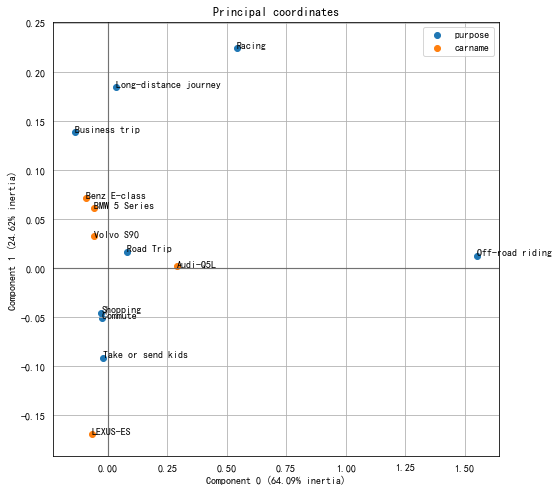

In [362]:
ax = ca.plot_coordinates(
    X=b,
    ax=None,
    figsize=(8,8),
    x_component=0,
    y_component=1,
    show_row_labels=True,
    show_col_labels=True
)
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False
plt.savefig("2.4B.png")

### C

In [8]:
data_label_c=pd.read_csv("2.4_C.csv")

In [9]:
label=['自驾游', '跑长途', '商务差旅', '上下班', '接送小孩', '购物',"赛车","越野"]
names_c=list(data_label_c["car_name"])
c=pd.DataFrame(columns=names_c,index=label)
c_pro=pd.DataFrame(columns=names_c,index=label)
labelcar_c=data_label_c["pruchase_purpose"]
for i in range(len(labelcar)):
    a=(pd.Series(eval(labelcar_c[i]))).value_counts()
    c[names_c[i]]=a+1
    c_pro[names_c[i]]=c[names_c[i]]/(c[names_c[i]].sum())
c

,凯迪拉克CT5,奥迪A4L,雷克萨斯ES,宝马3系,奔驰C级
自驾游,179,148,116.0,140,104.0
跑长途,39,68,33.0,41,32.0
商务差旅,35,30,61.0,42,19.0
上下班,277,271,266.0,266,265.0
接送小孩,92,88,100.0,75,58.0
购物,129,90,79.0,117,69.0
赛车,22,4,NaN,4,4.0
越野,6,3,NaN,5,NaN


In [11]:
c_pro.fillna(0)
c=c.fillna(1)#.astype(int)
label_en=['Road Trip','Long-distance journey','Business trip','Commute ','Take or send kids','Shopping','Racing','Off-road riding']
names_c_en=['Cadillac-CT5','Audi-A4L','BMW 3 Series','LEXUS-ES','Benz C-class']
labelmap= dict(map(lambda x,y:[x,y],label,label_en))
namemap_c=dict(map(lambda x,y:[x,y],names_c,names_c_en))
c.rename(index=labelmap,columns=namemap_c,inplace=True)
c_pros=c/300
c_pros

,Cadillac-CT5,Audi-A4L,BMW 3 Series,LEXUS-ES,Benz C-class
Road Trip,0.596667,0.493333,0.386667,0.466667,0.346667
Long-distance journey,0.130000,0.226667,0.110000,0.136667,0.106667
Business trip,0.116667,0.100000,0.203333,0.140000,0.063333
Commute,0.923333,0.903333,0.886667,0.886667,0.883333
Take or send kids,0.306667,0.293333,0.333333,0.250000,0.193333
Shopping,0.430000,0.300000,0.263333,0.390000,0.230000
Racing,0.073333,0.013333,0.003333,0.013333,0.013333
Off-road riding,0.020000,0.010000,0.003333,0.016667,0.003333


In [366]:
ca=prince.CA(
     n_components=2,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=44
)
c.columns.rename("carname",inplace=True)
c.index.rename("purpose",inplace=True)
c.fillna(0)
ca=ca.fit(c)

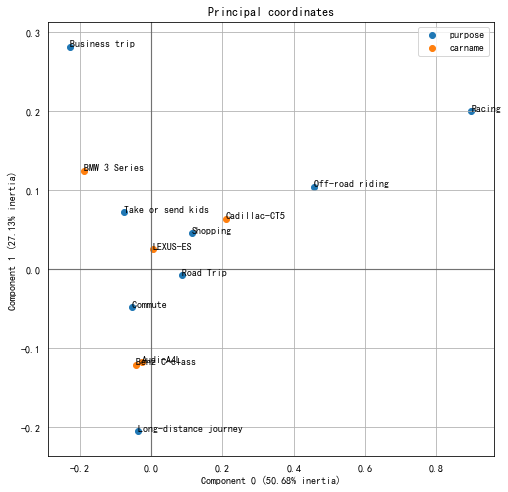

In [367]:
ax = ca.plot_coordinates(
    X=c,
    ax=None,
    figsize=(8.0,8.0),
    x_component=0,
    y_component=1,
    show_row_labels=True,
    show_col_labels=True
)
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False
plt.savefig("2.4C.png")